In [11]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [12]:
dataset=pd.read_csv("C:\\Users\\asus\\Desktop\\CarPrice_Assignment.csv")

In [13]:
dataset.shape

(205, 26)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
dataset.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [18]:
dataset.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

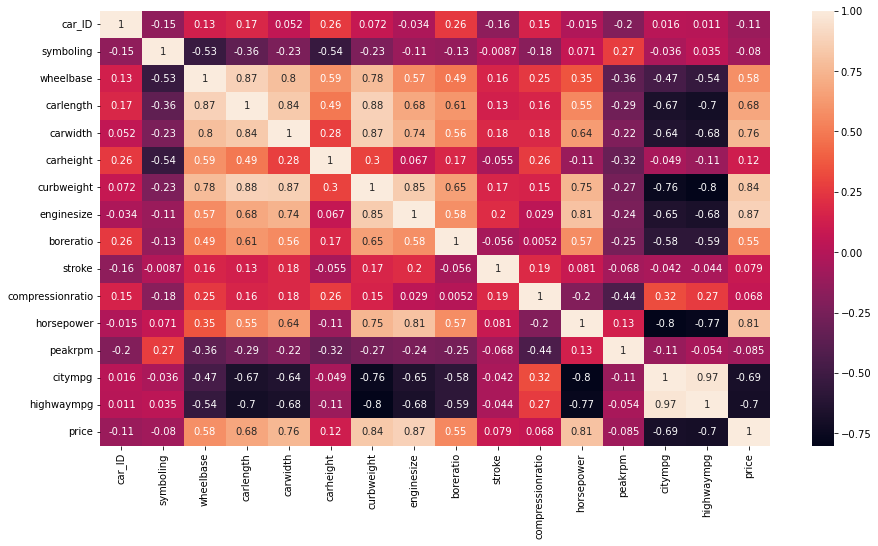

In [19]:
dataset.corr()
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [22]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [24]:

print(dataset['car_ID'].unique())


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]


In [26]:
final_dataset=dataset[["price","fueltype","horsepower","peakrpm","stroke","boreratio","compressionratio"]]

In [27]:
final_dataset.head()

,price,fueltype,horsepower,peakrpm,stroke,boreratio,compressionratio
0,13495.0,gas,111,5000,2.68,3.47,9.0
1,16500.0,gas,111,5000,2.68,3.47,9.0
2,16500.0,gas,154,5000,3.47,2.68,9.0
3,13950.0,gas,102,5500,3.40,3.19,10.0
4,17450.0,gas,115,5500,3.40,3.19,8.0


In [28]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [29]:
final_dataset.head()

,price,horsepower,peakrpm,stroke,boreratio,compressionratio,fueltype_gas
0,13495.0,111,5000,2.68,3.47,9.0,1
1,16500.0,111,5000,2.68,3.47,9.0,1
2,16500.0,154,5000,3.47,2.68,9.0,1
3,13950.0,102,5500,3.40,3.19,10.0,1
4,17450.0,115,5500,3.40,3.19,8.0,1


In [30]:
final_dataset.corr()

,price,horsepower,peakrpm,stroke,boreratio,compressionratio,fueltype_gas
price,1.000000,0.808139,-0.085267,0.079443,0.553173,0.067984,-0.105679
horsepower,0.808139,1.000000,0.131073,0.080940,0.573677,-0.204326,0.163926
peakrpm,-0.085267,0.131073,1.000000,-0.067964,-0.254976,-0.435741,0.476883
stroke,0.079443,0.080940,-0.067964,1.000000,-0.055909,0.186110,-0.241829
boreratio,0.553173,0.573677,-0.254976,-0.055909,1.000000,0.005197,-0.054451
compressionratio,0.067984,-0.204326,-0.435741,0.186110,0.005197,1.000000,-0.984356
fueltype_gas,-0.105679,0.163926,0.476883,-0.241829,-0.054451,-0.984356,1.000000


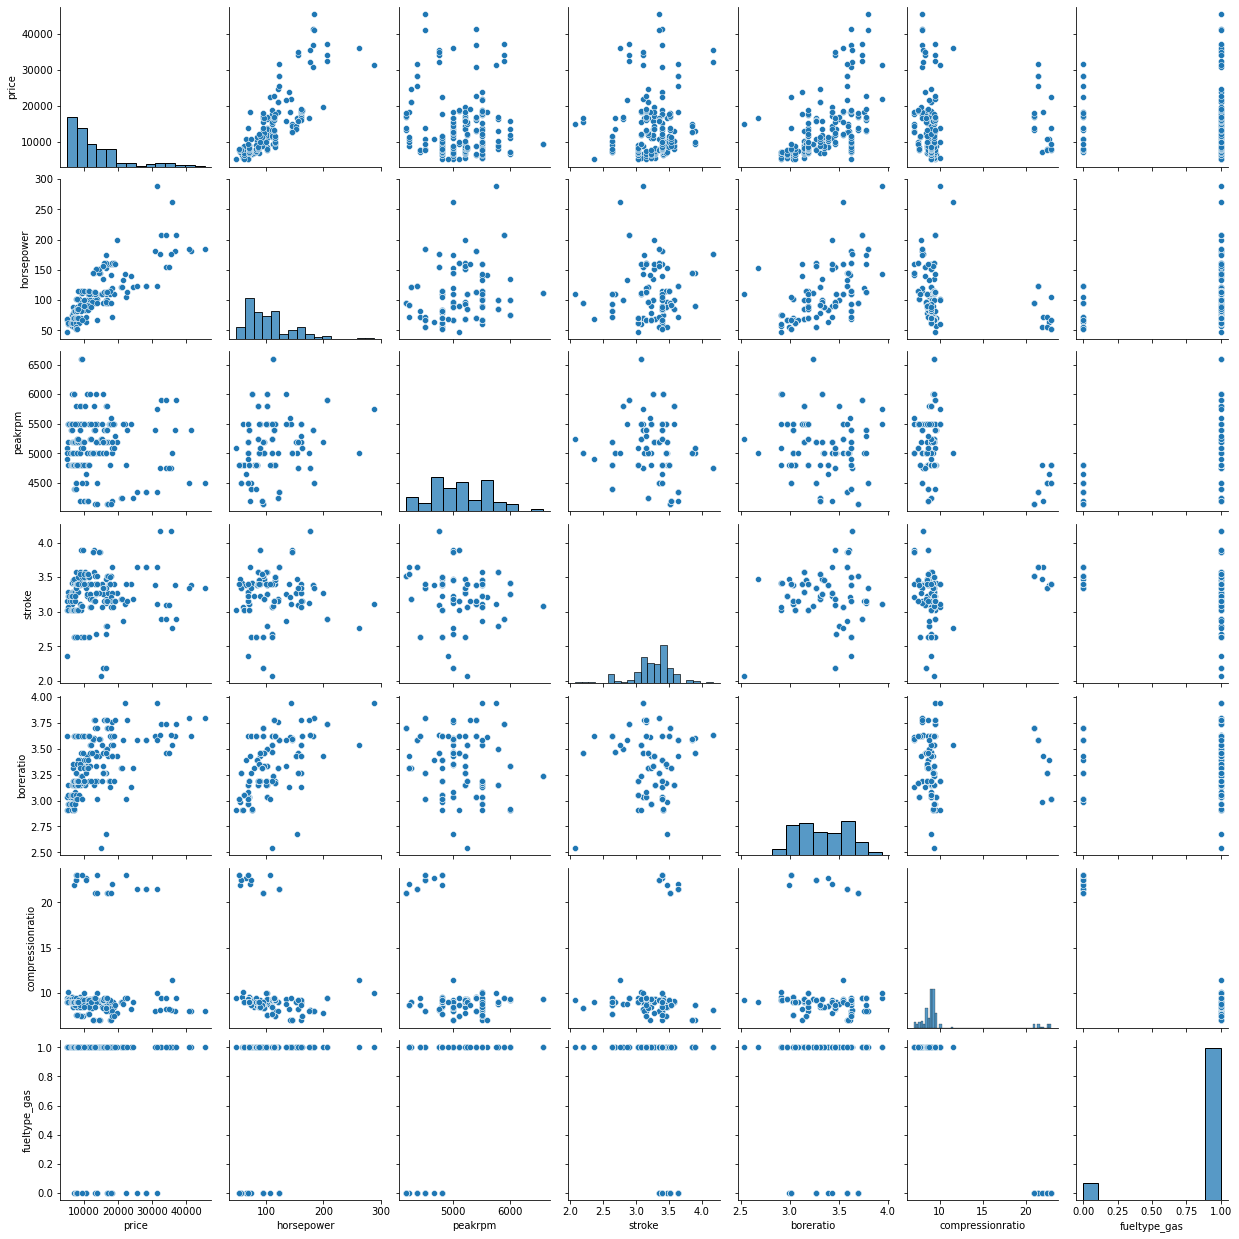

In [31]:
sns.pairplot(final_dataset)

In [32]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [34]:
X

,horsepower,peakrpm,stroke,boreratio,compressionratio,fueltype_gas
0,111,5000,2.68,3.47,9.0,1
1,111,5000,2.68,3.47,9.0,1
2,154,5000,3.47,2.68,9.0,1
3,102,5500,3.40,3.19,10.0,1
4,115,5500,3.40,3.19,8.0,1
...,...,...,...,...,...,...
200,114,5400,3.15,3.78,9.5,1
201,160,5300,3.15,3.78,8.7,1
202,134,5500,2.87,3.58,8.8,1
203,106,4800,3.40,3.01,23.0,0


In [35]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_prediction=lr.predict(X_test)

In [43]:
y_prediction

array([ 5688.67574066, 21677.71983167, 12412.22969769,  2201.44529105,
       12251.70147187, 16568.04226622,  5330.14813046,  4913.61962966,
       22637.76546864,  5768.61874659, 16667.76662739, 46635.29576265,
       11567.92233474, 14205.40507913,  6147.60752209, 16568.04226622,
       10749.18245389, 12412.22969769,  8374.76044909,  4913.61962966,
       12366.05148934, 10683.28575102, 10749.18245389, 16568.04226622,
       22643.93572269,  7536.7358562 ,  6742.08758571, 10683.28575102,
        6742.08758571,  6476.59357334,  8932.17225484,  9140.63821416,
       21425.27162865, 11568.49527851,  6476.59357334, 25802.81632022,
        8964.28461742, 22533.91217715,  5330.14813046, 27819.4030237 ,
        6147.60752209, 12753.06786298, 21624.71824514, 10894.2712001 ,
       13666.8799493 ,  5330.14813046,  5330.14813046, 18982.53680803,
       13666.8799493 ,  8932.17225484, 17183.13525163,  8943.98970283,
        6742.08758571,  9536.0859184 , 25486.8366414 , 22637.76546864,
      

In [44]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_prediction)

In [45]:
print("r2_score - >", score)

r2_score - > 0.5969973204104212
